In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spstats
from scipy.misc import comb

# Hypothesis Testing

Hypothesis testing is a method of statistical inference where in the simplest case, two statistical data sets are compared in order to discern if a non-trivial statistical relationship between the means of the two data sets is likely.

Suppose for example we work for a social media company which wants to begin showing advertisements to users. We have developed two different ad suggestion algorithms A and B. Our boss wants us to tell them which one should be rolled out. Of course we shouldn't just choose at random. We must develop an experiment with the goal of figuring out which to go with.

Let's say we did just that. Each day we assign new users uniformly to either variant A or B. Now, suppose we measure revenue per day per available user (i.e. user signed up for that variant). Our data set might look something like the following:

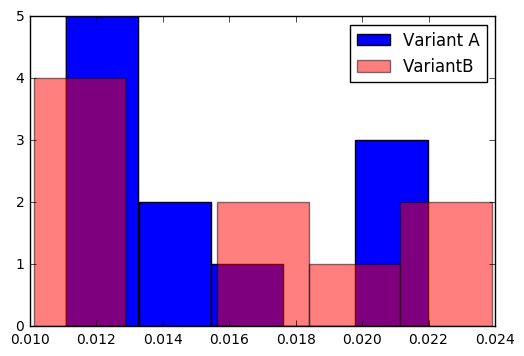

In [2]:
np.random.seed(41)
num_points=20
Variant=np.random.choice(['A','B'],num_points)
RevUserDayA=np.random.normal(0.016,0.0040,sum(Variant=='A'))
RevUserDayB=np.random.normal(0.0185,0.0045,sum(Variant=='B'))
plt.hist(RevUserDayA,bins=int(num_points/4),label='Variant A')
plt.hist(RevUserDayB,bins=int(num_points/4),color='r',alpha=0.5,label='VariantB')
plt.legend()
plt.show()

If we calculate the mean value we see that Variant B gives a higher revenue per day per available user:

In [3]:
print('Variant A mean revenue per day per user:',RevUserDayA.mean())
print('Variant B mean revenue per day per user:',RevUserDayB.mean())

Variant A mean revenue per day per user: 0.0152496419469
Variant B mean revenue per day per user: 0.0159165080372


But should we really recommend variant B on this basis? We wish to be able to say with some statistical certainty that the mean revenue per day per user for variant B is actually greater. To formalize this we have two hypotheses:

- Null Hypothesis: The mean revenue per day per user is the same for both groups

- Hypothesis 1: The mean revenue per day per user is different. (Note we could say B is greater, both situations will be discussed.)

According to the central limit theorem, the mean revenue per day per user should asymptotically follow a normal distribution with mean $\mu$ ($\mu$ is the population mean) and variance $\sigma^2/n$ ($\sigma$ is the population standard deviation). In general, we don't know the quantities $\mu$ and $\sigma$ in which case one may use unbiased estimates from the sample. However, in this case, the so called t distribution is the appropriate pdf. If we plot the t distribution for the difference in means of variant A and B under the null hypothesis that the mean is zero, we find:

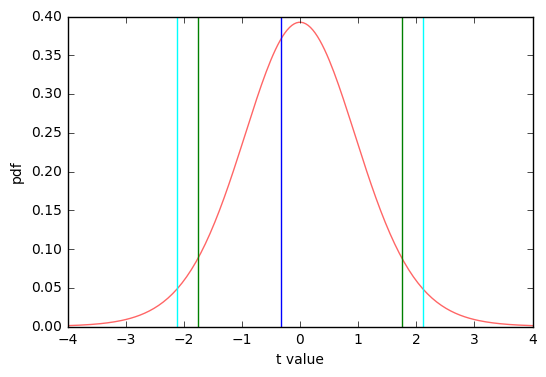

In [4]:
x = np.linspace(-4,4,200)
s=np.sqrt(RevUserDayA.var()/len(RevUserDayA)+RevUserDayB.var()/len(RevUserDayB))
t=(RevUserDayA.mean()-RevUserDayB.mean())/s
alpha = 0.05
dfs=(s**4.0/((RevUserDayA.var()/len(RevUserDayA))**2/(len(RevUserDayA)-1)
         +(RevUserDayB.var()/len(RevUserDayB))**2/(len(RevUserDayB)-1)))
t_o95 = spstats.t.ppf(1-alpha,df=dfs)
t_t95 = spstats.t.ppf(1-alpha/2,df=dfs)
plt.plot(x, spstats.t.pdf(x,dfs),'r-', alpha=0.6, label='norm pdf')
plt.xlabel('t value')
plt.ylabel('pdf')
plt.axvline(x=t)
plt.axvline(x=t_o95,c='g')
plt.axvline(x=-t_o95,c='g')
plt.axvline(x=t_t95,c='cyan')
plt.axvline(x=-t_t95,c='cyan')
plt.show()

In [5]:
spstats.ttest_ind(RevUserDayA,RevUserDayB,equal_var=False)

Ttest_indResult(statistic=-0.31431674407489707, pvalue=0.75747084219408589)

In [6]:
t

-0.33204226193504549

But we know from constructing the data that we expect a larger mean for group B. What happened? We had too small of a sample size. Let's compare this to the case where we have 200 samples from each group.

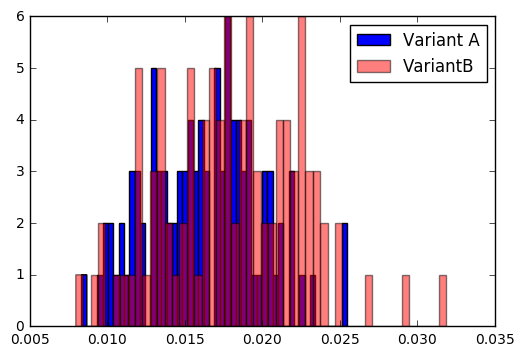

In [7]:
np.random.seed(41)
num_points=200
Variant=np.random.choice(['A','B'],num_points)
RevUserDayA=np.random.normal(0.016,0.004,sum(Variant=='A'))
RevUserDayB=np.random.normal(0.0185,0.0045,sum(Variant=='B'))
plt.hist(RevUserDayA,bins=int(num_points/4),label='Variant A')
plt.hist(RevUserDayB,bins=int(num_points/4),color='r',alpha=0.5,label='VariantB')
plt.legend()
plt.show()

In [8]:
print('Variant A mean revenue per day per user:',RevUserDayA.mean())
print('Variant B mean revenue per day per user:',RevUserDayB.mean())

Variant A mean revenue per day per user: 0.0162071333194
Variant B mean revenue per day per user: 0.0180144085627


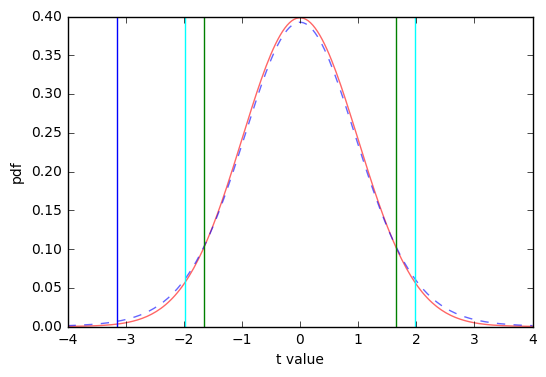

In [9]:
x = np.linspace(-4,4,200)
s=np.sqrt(RevUserDayA.var()/len(RevUserDayA)+RevUserDayB.var()/len(RevUserDayB))
t=(RevUserDayA.mean()-RevUserDayB.mean())/s
alpha = 0.05
dfs=(s**4.0/((RevUserDayA.var()/len(RevUserDayA))**2/(len(RevUserDayA)-1)
         +(RevUserDayB.var()/len(RevUserDayB))**2/(len(RevUserDayB)-1)))
t_o95 = spstats.t.ppf(1-alpha,dfs)
t_t95 = spstats.t.ppf(1-alpha/2,dfs)
plt.plot(x, spstats.t.pdf(x,dfs),'r-', alpha=0.6, label='norm pdf')
plt.plot(x, spstats.t.pdf(x,15.613462011796592),'b--', alpha=0.6, label='norm pdf')
plt.xlabel('t value')
plt.ylabel('pdf')
plt.axvline(x=t)
plt.axvline(x=t_o95,c='g')
plt.axvline(x=-t_o95,c='g')
plt.axvline(x=t_t95,c='cyan')
plt.axvline(x=-t_t95,c='cyan')
plt.show()

In [10]:
spstats.ttest_ind(RevUserDayA,RevUserDayB,equal_var=False)

Ttest_indResult(statistic=-3.1318231874999194, pvalue=0.0020123725143364256)

In [11]:
t

-3.1476007341430612

Now we can make the recommendation with confidence. Group B produces a larger mean revenue per day per user than A with > 95% confidence. This however does not tell us with certainty that variant B is better. Before moving to Bayesian inference, let's stop to discuss the types of errors that may be made with this perspective.

|  Fail to Reject Null Hypothesis |   Reject Null Hypothesis |
 ------|------|------|
__Null Hypothesis is True__      |True Negative (tn) |False Positive (fp) (Type I Error)|
__Null Hypothesis is False__      | False Negative (fn) (Type II Error)| True Positive (tp)|


There are a number of important quantities associated with this table, two of the most commonly discussed are precision and recall.

Precision $= \dfrac{tp}{tp + fp}$

This measures our ability to correctly reject the null hypothesis when it is true. High precision is important e.g. in trial by jury where a defendent should be assumed innocent until proven guilty

Recall $= \dfrac{tp}{tp + fn}$ 

This measures our ability to capture all cases where the null hypothesis is false. High recall is important for example when missing a positive result would be detrimental, such as cancer or other disease screening.

Note that by setting a requirement that we are statistically > 95% confident before rejecting the null hypothesis, we restrict the probability of a Type I error to be below 5%. On the other hand, the higher we set this threshold, the more likely it seems we are to make a Type II error. Alternatively, one may think of this as resulting in a precision-recall trade-off.

While we will not delve further into the topic of Type II error here, suffice it to say that the quantity power is defined as 

Power $= 1 - P($Type II error$)$

The sample size, effect size (e.g. difference in means you want to detect), Type I and Type II errors are intertwined and important considerations in experiment design, and power is the quantity that directly controls the probability of Type II error. (see e.g. https://en.wikipedia.org/wiki/Statistical_power)


## Summary of Hypothesis Testing

1) Utilize to compare a statistic of two data sets
    - May be relaxed e.g. via Bonferroni correction
    
2) Statistic to be compared should follow a t-distribution
    - May be relaxed by perfoming different tests in appropriate circumstances (e.g. exact binomial test)
    
3) We must assume a cutoff probability for Type I error to make an inference
    - Power analysis requires some additional input such as the expected effect size

---------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------







# Bayesian Inference

Bayesian inference is another method of statistical inference which relies on Bayes theorem, so we will start there.

## Bayes Theorem:

$P(H|D) = \dfrac{P(D|H) P(H)}{P(D)}$

H and D were chosen as notation to be suggestive. If we read H as hypothesis and D as data, then we may read Bayes' Theorem as:

"The probability of a hypothesis given some observed data (posterior) is the probability of observing that data under the hypothesis (likelihood) multiplied by the probability of the hypothesis (prior) normalized by the probability of observing the data (evidence)."

This allows us to characterize our certainty in a hypothesis given data. 

Let's work out a case in two different ways.

Suppose we flip an unfair coin. We will try to extract how unfair the coin is. But first lets generate some unfair coin data.

In [12]:
np.random.seed(42)
n_flips=100
flips=np.random.choice([0,0,0,1,1,1,1,1,1,1],n_flips)

The coin flips are Bernoulli trials. Then the probability of k successes (x=1) in a series of n flips then follows the distribution (p is probability of success):

$P(k| n, p)=$ $n \choose k$ $p^k(1-p)^{(n-k)}$

Since we will fix n=100, we have

$P(k|p)=$ $100 \choose k$ $p^k(1-p)^{(100-k)}$

This is our likelihood function (k is our data, and we are considering inferring p). If we assume no knowledge of the bias, we may use a uniform prior 

$P(p) = 1$

In this case, the term in the denominator of Bayes theorem is inconsequential as it is just a constant. We may then find the value of p which maximizes the likelihood function as the best choice for our model parameter p. This is the maximum likelihood estimate. For our data k is

In [13]:
sum(flips)

74

Our best choice of p is then found by maximizing

$P(74|p)=$ $100 \choose 74$ $p^{74}(1-p)^{26}$

which means solving 

$\dfrac{dP}{dp} \propto 74p^{73}(1-p)^{26}-26p^{74}(1-p)^{25}=0$

or 

$\dfrac{p}{1-p}=\dfrac{74}{26}=\dfrac{37}{13}$

$p = 0.74$

In [14]:
74/26/(1+74/26)

0.74

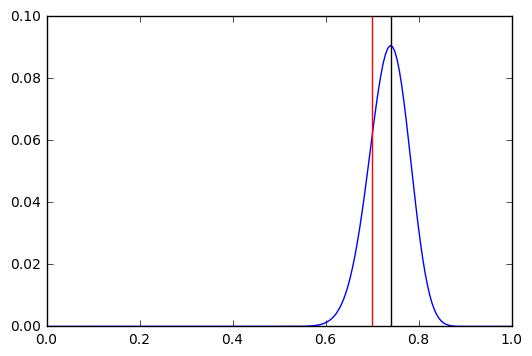

In [15]:
x=np.linspace(0,1,200)
y=comb(100,74)*x**74*(1-x)**26
plt.plot(x,y)
plt.axvline(x=0.74,c='k')
plt.axvline(x=0.7,c='r')
plt.show()

This is reasonably close to the actual value $p=0.7$ specified when generating the data. Furthermore, since we have an (here unnormalized) distribution for p given the data, we can actually define confidence intervals for our parameter p.

Interestingly, the above case is a specific example of having a prior distribution which is conjugate to the likelihood. In such an example, analytic insight into the problem is relatively easy to come by. For a binomial likelihood function, the beta distribution given by

$f(x;\alpha,\beta)= \dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{(\alpha-1)}(1-x)^{(\beta-1)}$

In this case, it is possible to show that for a likelihood function

$P(k,n|p)=$ $n \choose k$ $p^k(1-p)^{(n-k)}$

the posterior will be

$f(x;\alpha,\beta)= \dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{(\alpha-1)}(1-x)^{(\beta-1)}$

$P(p|k,n) = \dfrac{\Gamma(\alpha+k+\beta+(n-k))}{\Gamma(\alpha+k)\Gamma(\beta+(n-k))} x^{(\alpha+k-1)}(1-x)^{(\beta+(n-k)-1)}$.

Since the posterior and prior are of the same form one may consider updating the posterior one data point at a time. Then we have n=1 and k=0 or 1 depending on the trial. Let's see this in action for our previous example where $\alpha=1=\beta$

In [16]:
alpha=[1]
beta=[1]
for i in range(0,n_flips):
    
    alpha.append(alpha[i]+flips[i])
    beta.append(beta[i]+1-flips[i])
    

x=np.linspace(0,1,200)
y=101*comb(100,74)*x**74*(1-x)**26

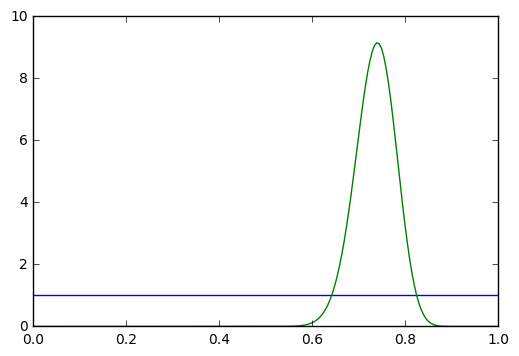

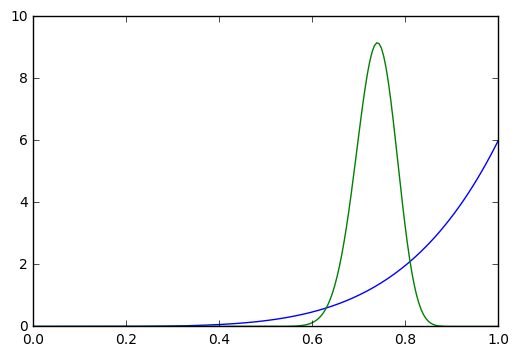

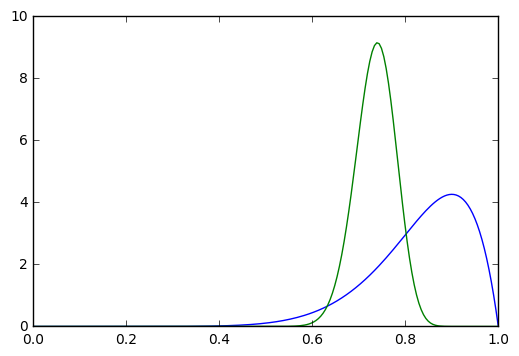

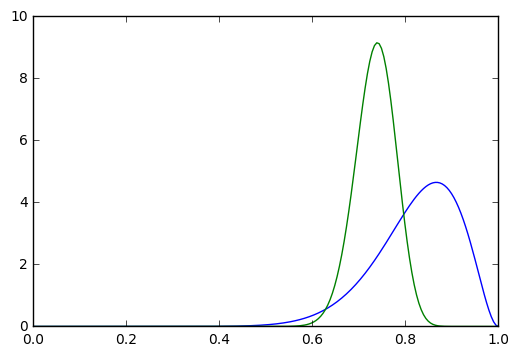

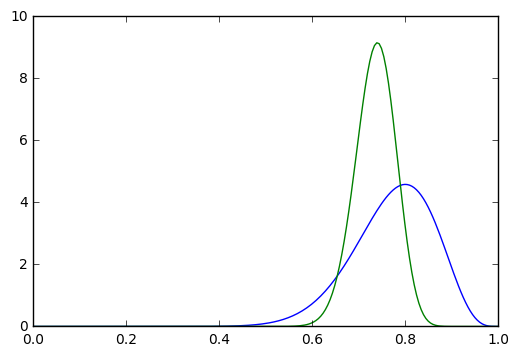

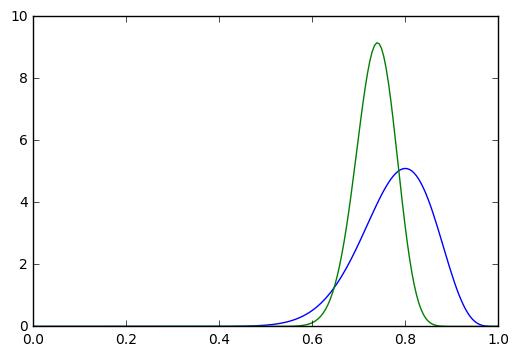

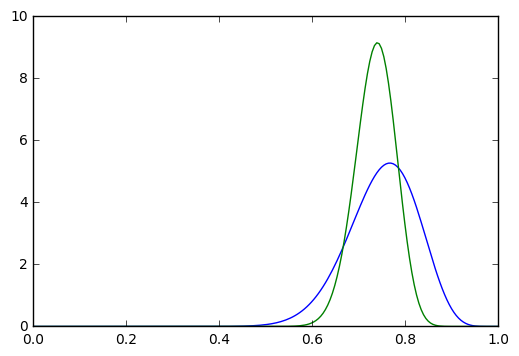

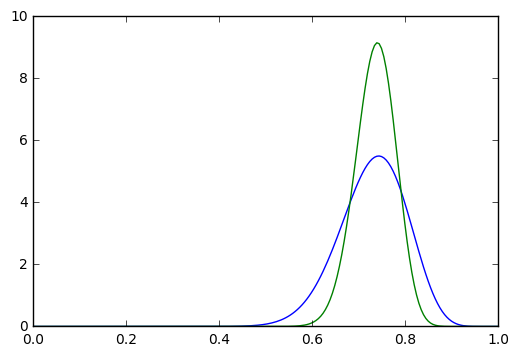

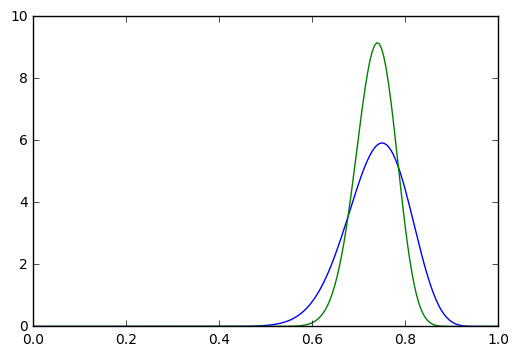

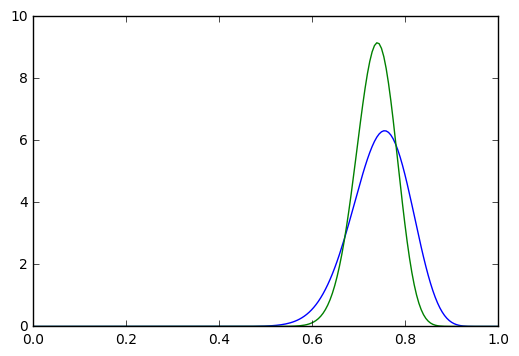

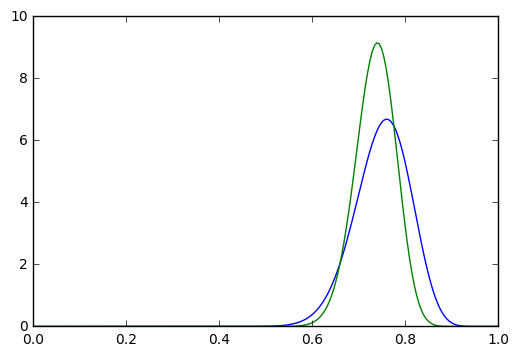

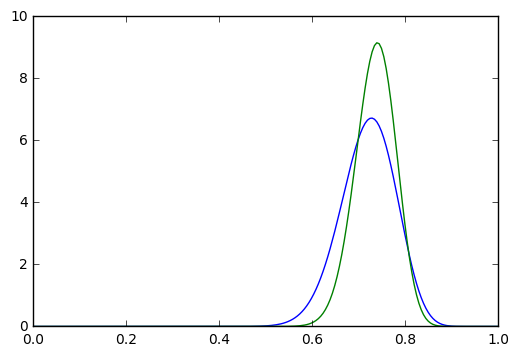

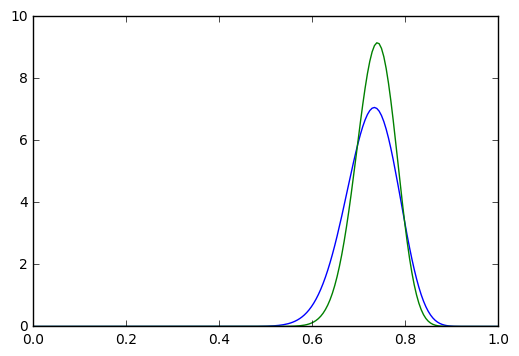

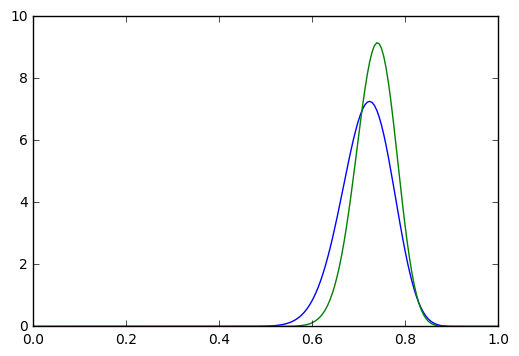

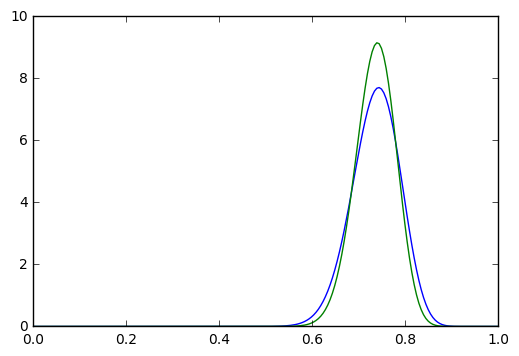

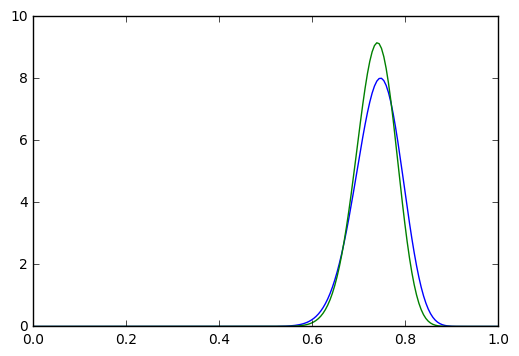

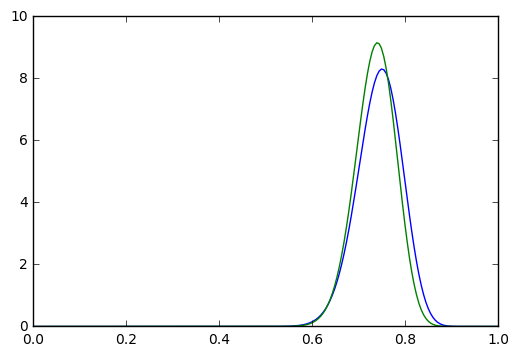

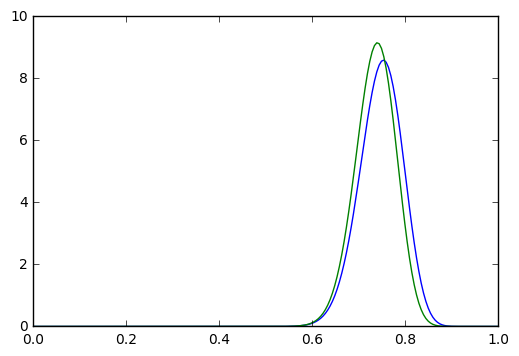

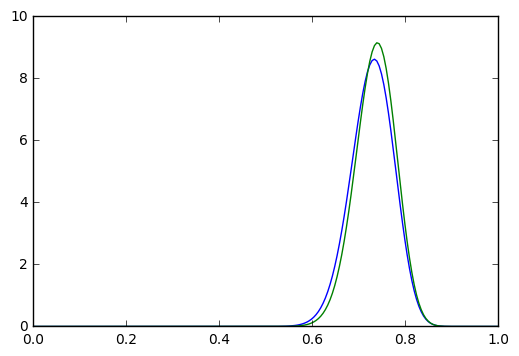

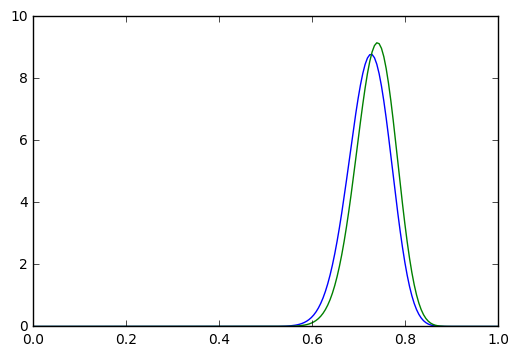

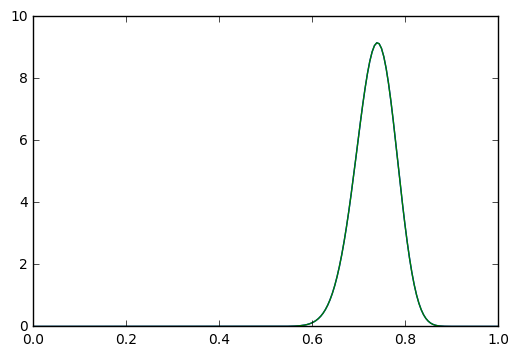

In [17]:
for Trial in range(0,101,5):
    plt.plot(x,spstats.beta.pdf(x,alpha[Trial],beta[Trial]),x,y)
    plt.show()

Now, as a final example, let's consider a continuous outcome. Suppose we have a processes which we will model as random normal with mean $\mu$ and standard deviation $\sigma$. Let's try to find the posterior distribution for the parameters $\mu$ and $\sigma$ given some data, but assuming very little about the process. Perhaps this is a process where physically we know that the mean must lie between 0 and 100 and the standard deviation must lay between 1 and 100. Furthermore lets assume that we expect the values to be on the small side. Let's naively characterize this uncertainty by taking a prior which drops to zero outside of the allowed area but is otherwise linear in $\sigma$ and $\mu$ with a maximum at $\mu=0$ and $\sigma=1$ specifically

$P(\mu,\sigma)=\dfrac{(100-\mu)+(100-\sigma)}{985050}$ for $\mu,\sigma \in [0,100] \times [1,100]$

We also have the likelihood function

$P(x|\mu,\sigma) = \prod_{i=1}^N \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{-(x_i-\mu)/(2 \sigma^2)}$

Now let's generate some data

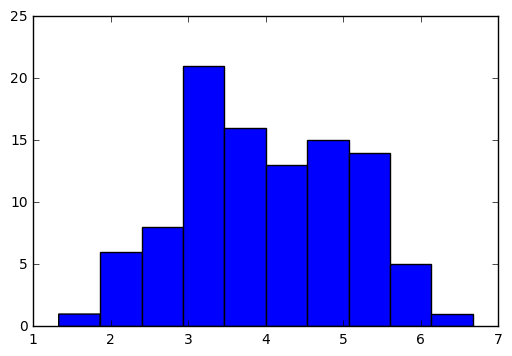

4.02034831373
1.05816168813


In [18]:
np.random.seed(41)
num_points=100
gaussproc=np.random.normal(4.16,1,num_points)
plt.hist(gaussproc)
plt.show()
print(gaussproc.mean())
print(gaussproc.std())

Now, let's ignore the evidence for now, since that amounts to an overall normalization for our posterior, and just sample our posterior distribution. We know that the posterior must be zero outside $\mu,\sigma \in [0,100] \times [1,100]$, so let's sample uniformly in that region.

In [19]:
mugrid=np.linspace(3,5,100)
sigmagrid=np.linspace(.5,1.5,100)
postgrid=np.zeros((len(mugrid),len(sigmagrid)))
N=len(gaussproc)
batches=np.zeros((len(mugrid),len(sigmagrid)))

for i in range(0,len(mugrid)):
    for j in range(0,len(sigmagrid)): 
        prodbatch=[]
        for k in range(0,int(N/100)):
            prodbatch.append((((1/np.sqrt(2*np.pi*sigmagrid[j]**2.0))**len(gaussproc[k*100:(k+1)*(100)]))\
                           *np.exp(-(np.sum((gaussproc[k*100:(k+1)*(100)]-mugrid[i])**2.0)/(2*sigmagrid[j]**2.0)))))
        
        batches[i,j]=np.product(prodbatch)

batches=batches/np.max(batches)

for i in range(0,len(mugrid)):
    for j in range(0,len(sigmagrid)):            
        postgrid[i][j]=batches[i,j]\
                        *((100-mugrid[i])+(100-sigmagrid[j]))/985050


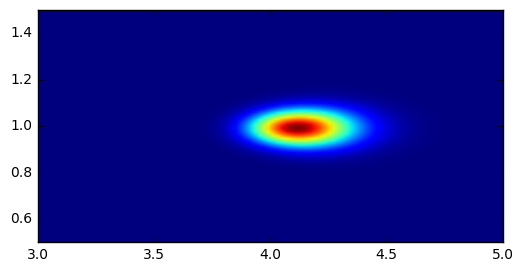

In [21]:
plt.imshow(postgrid,extent=[3,5,0.5,1.5])
plt.show()